In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

boston = load_boston()
X, y = boston.data, boston.target
clf1 = LinearRegression().fit(X, y)

coef_df = pd.DataFrame(clf1.coef_,
                       index=boston.feature_names,
                       columns=['clf1'])
coef_df

,clf1
CRIM,-0.108011
ZN,0.046420
INDUS,0.020559
CHAS,2.686734
NOX,-17.766611
RM,3.809865
AGE,0.000692
DIS,-1.475567
RAD,0.306049
TAX,-0.012335


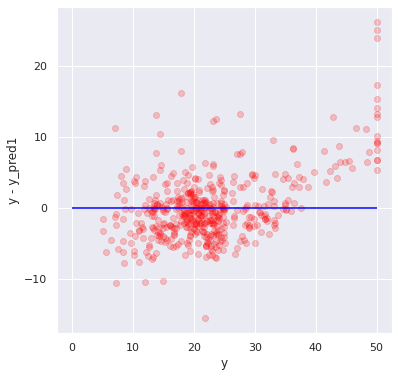

In [37]:
#  横軸がy(実際値)、縦軸がy-y_pred（誤差）
y_pred1 = clf1.predict(X)
plt.figure(figsize=(6, 6))
plt.hlines([0], min(y)-5, max(y) , color='blue')
plt.scatter(y, y - y_pred1, color='red', marker='o', alpha=0.2)
plt.xlabel('y')
plt.ylabel('y - y_pred1');

https://qiita.com/Takayoshi_Makabe/items/faa735ae0db9655b2ea9

https://dafriedman97.github.io/mlbook/content/c1/code.html


In [48]:
class OLinerReg:

    def __init__(self):
        self.w_ = None
        

    def fit(self,x,y):
        self.x = np.array(x)
        self.y = np.array(y)
        #切片用の列を追加
        
        self.x = np.insert(x, 0, 1, axis=1)
        
        #https://qiita.com/Takayoshi_Makabe/items/faa735ae0db9655b2ea9を参照
        XtX = np.dot(self.x.T, self.x)
        Xty = np.dot(self.x.T, self.y)
        XtX_inv = np.linalg.inv(XtX) #XtXの逆行列
        self.w_ = np.dot(Xty, XtX_inv) #重み

        self.y_hat = np.dot(self.x, self.w_)
        
        # calculate loss
        self.L = .5*np.sum((self.y - self.y_hat)**2)
    
    def pred(self,x):
        x = np.insert(x, 0, 1, axis=1)
        self.y_test_hat = np.dot(x, self.w_)





In [49]:
clf2 = OLinerReg()
clf2.fit(X, y)
coef_df['clf2'] = clf2.w_[1:]
coef_df

,clf1,clf2
CRIM,-0.108011,-0.108011
ZN,0.046420,0.046420
INDUS,0.020559,0.020559
CHAS,2.686734,2.686734
NOX,-17.766611,-17.766611
RM,3.809865,3.809865
AGE,0.000692,0.000692
DIS,-1.475567,-1.475567
RAD,0.306049,0.306049
TAX,-0.012335,-0.012335


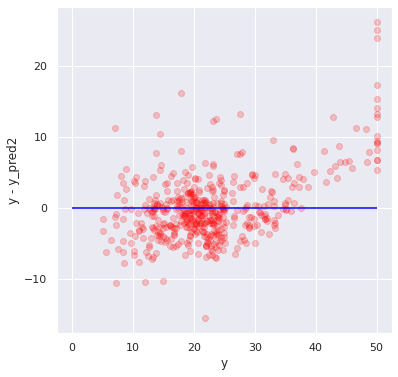

In [50]:
#  横軸がy(実際値)、縦軸がy-y_pred（誤差）
clf2.pred(X)
y_pred2 = clf2.y_test_hat
plt.figure(figsize=(6, 6))
plt.hlines([0], min(y)-5, max(y) , color='blue')
plt.scatter(y, y - y_pred2, color='red', marker='o', alpha=0.2)
plt.xlabel('y')
plt.ylabel('y - y_pred2');